In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from nxviz import CircosPlot
from nxviz import annotate
from typing import List, Tuple

/home/barcode/.local/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
import json

reader = open('faculty_major.json')
data = json.load(reader)
reader.close()

majors = {}

for each in data:
    majs = each["majors"]

    for major in majs:
        majors[str(major["code"])] = major["acronym"]

In [3]:
reader = open('weight_normalized.txt')
raw = reader.read().split('\n')
reader.close()

data: List[Tuple[str,str,float]] = []

numbers = []

nodes = set()

for each in raw:
    splitted = each.split(' ')
    nodes.add(splitted[0])
    nodes.add(splitted[1])
    number = float(splitted[2])/10 # rescale to 1-10
    numbers.append(number)
    data.append((splitted[0], splitted[1], number))

nodes = list(nodes)
nodes.sort()
data.sort()
print(nodes)

['FITB-120', 'FITB-128', 'FITB-129', 'FITB-151', 'FMIPA-101', 'FMIPA-102', 'FMIPA-103', 'FMIPA-105', 'FMIPA-108', 'FSRD-170', 'FSRD-172', 'FSRD-173', 'FSRD-174', 'FSRD-175', 'FTI-130', 'FTI-133', 'FTI-134', 'FTI-143', 'FTI-144', 'FTI-145', 'FTMD-131', 'FTMD-136', 'FTMD-137', 'FTSL-150', 'FTSL-153', 'FTSL-155', 'FTSL-157', 'FTSL-158', 'FTTM-121', 'FTTM-122', 'FTTM-123', 'FTTM-125', 'SAPPK-152', 'SAPPK-154', 'SBM-190', 'SBM-192', 'SF-107', 'SF-116', 'SITH-104', 'SITH-106', 'SITH-112', 'SITH-114', 'SITH-115', 'SITH-119', 'STEI-132', 'STEI-135', 'STEI-180', 'STEI-181', 'STEI-182', 'STEI-183']


In [4]:
G = nx.Graph(name="Curriculum Similarity Graph")

for node in nodes:
    splt = node.split('-')
    major = majors[splt[1]]

    G.add_node(major, faculty=splt[0], major=major)

cutoff = np.quantile(numbers, 0.85)
high_cutoff = np.quantile(numbers, 0.98)
mid_cutoff = np.quantile(numbers, 0.95)
print(f"Cutoff val {cutoff} high cutoff {high_cutoff}")

for i in range(len(data)):
    a, b, w = data[i]

    a_major = majors[a.split('-')[1]]
    b_major = majors[b.split('-')[1]]

    if w > cutoff:
        if w >= high_cutoff:
            color = 0
            alpha = 1
        elif w >= mid_cutoff:
            color = -2
            alpha = w/14.5
        else:
            color = 2
            alpha = w/15
            
        G.add_edge(a_major,b_major, weight=w/4, color=color, alpha=alpha)

Cutoff val 8.60960885025196 high cutoff 9.460192147509115


/home/barcode/.local/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


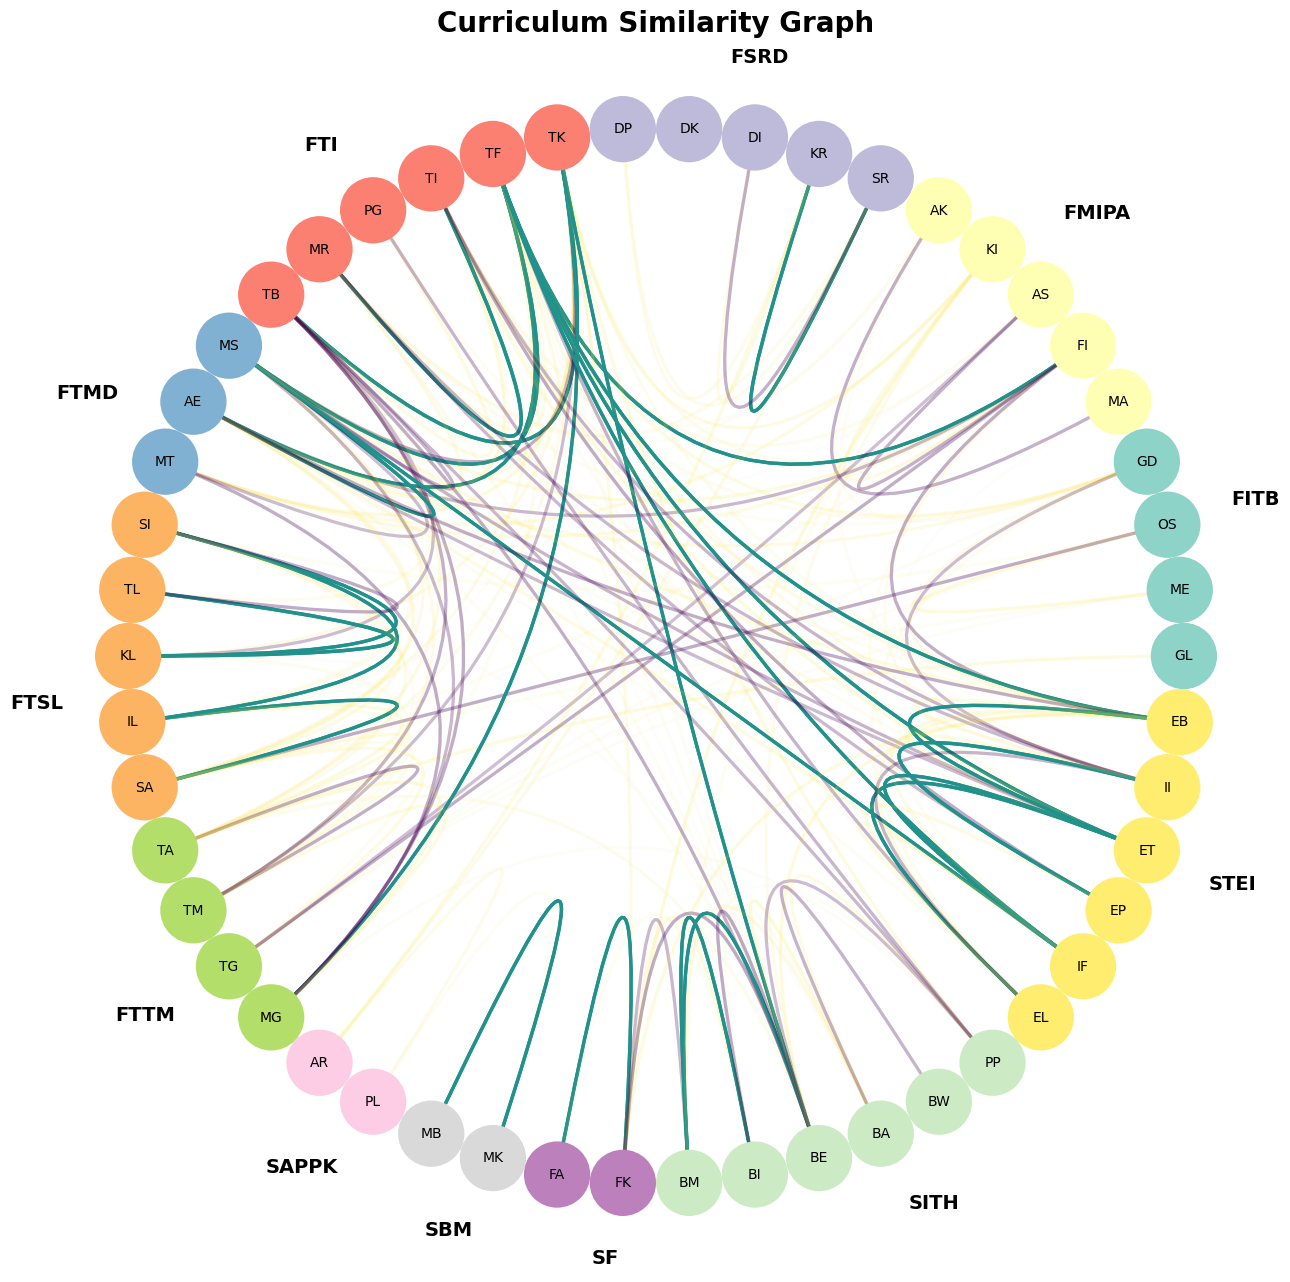

In [5]:
plt.rcParams['figure.figsize'] = (16,16)


c = CircosPlot(G, 
    node_color='faculty', 
    node_grouping="faculty", 
    edge_width="weight",
    edge_alpha="alpha",
    edge_color="color"
    )

annotate.circos_labels(G)
annotate.circos_group(G, group_by="faculty", fontdict={"size": 14, "weight": "bold"}, radius_offset=2)

plt.title("Curriculum Similarity Graph", fontdict={"size": 20, "weight": "bold"})
plt.show()